# Projet P6 : Classifiez automatiquement des biens de consommation

## Contexte

<b> MISSION 1 : </b>

Vous √™tes Data Scientist au sein de l‚Äôentreprise "Place de march√©‚Äù, qui souhaite lancer une marketplace e-commerce.

Sur cette place de march√© anglophone, des vendeurs proposent des articles √† des acheteurs en postant une photo et une description.

Pour l'instant, l'attribution de la cat√©gorie d'un article est effectu√©e manuellement par les vendeurs, et est donc peu fiable. De plus, le volume des articles est pour l‚Äôinstant tr√®s petit.

Pour rendre l‚Äôexp√©rience utilisateur des vendeurs (faciliter la mise en ligne de nouveaux articles) et des acheteurs (faciliter la recherche de produits) la plus fluide possible, et dans l'optique d'un passage √† l'√©chelle,  il devient n√©cessaire d'automatiser cette t√¢che d‚Äòattribution de la cat√©gorie.

Linda, Lead Data Scientist, vous demande donc d'√©tudier la faisabilit√© d'un moteur de classification d‚Äôarticles, en utilisant leur image et leur description sur le jeu de donn√©es d'articles disponible dans la premi√®re pi√®ce jointe de ce mail.

Pourrais-tu analyser les descriptions textuelles et les images des produits, au travers des √©tapes suivantes : 
- Un pr√©traitement des donn√©es texte et image 
- Une extraction de features 
- Une r√©duction en 2 dimensions, afin de projeter les produits sur un graphique 2D, sous la forme de points dont la couleur correspondra √† la cat√©gorie r√©elle 
- Une analyse du graphique afin de conclure, √† l‚Äôaide des descriptions ou des images, sur la faisabilit√© de regrouper automatiquement des produits de m√™me cat√©gorie 
- Une r√©alisation d‚Äôune mesure pour confirmer ton analyse visuelle, en calculant la similarit√© entre les cat√©gories r√©elles et les cat√©gories issues d‚Äôune segmentation en clusters
 
Pourrais-tu nous d√©montrer ainsi la faisabilit√© de regrouper automatiquement des produits de m√™me cat√©gorie ? 

Afin d‚Äôextraire les features image, il sera n√©cessaire de mettre en ≈ìuvre :
- un algorithme de type SIFT / ORB / SURF ;
- un algorithme de type CNN Transfer Learning.
 
Afin d‚Äôextraire les features texte, il sera n√©cessaire de mettre en ≈ìuvre : 
- deux approches de type bag-of-words, comptage simple de mots et Tf-idf ;
- une approche de type word/sentence embedding classique avec Word2Vec (ou Glove ou FastText) ;
- une approche de type word/sentence embedding avec BERT ;
- une approche de type word/sentence embedding avec USE (Universal Sentence Encoder).

<b> MISSION 2 : </b>

Pourrais-tu r√©aliser une classification supervis√©e √† partir des images ? Je souhaiterais que tu mettes en place une data augmentation afin d‚Äôoptimiser le mod√®le. 

De plus, nous souhaitons √©largir notre gamme de produits √† l‚Äô√©picerie fin

 

Pour cela, pourrais-tu tester la collecte de produits √† base de ‚Äúchampagne‚Äù via l‚ÄôAPI dis ponib
https://developer.edamam.com/food-database-apiei ? 

 

Pourrais-tu ensuite nous proposer un script ou notebook Python permettant une extraction des 10 premiers produits dans un fichier ‚Äú.csv‚Äù, contenant pour chaque produit les donn√©es suivantes : foodId, label, category, foodContentsLabel, image.

## Etapes du projet :

D√©montrer la faisabilit√© de regrouper automatiquement des produits de m√™me cat√©gorie.

- <b> Etape pr√©liminaire : </b> Importation des donn√©es ( --> NoteBook1 : Traitement des textes )
- <b> Etape 1 : </b> Text cleaning et feature engineering ( --> NoteBook1 : Traitement des textes ) 
- <b> Etape 2 : </b> Cat√©gorisation des descriptions ( --> NoteBook 2 et 3 : M√©thodes bag of words et Word_embedding )
- <b> Etape 3 : </b> Pr√©-traitement et classification d'images (SIFT et CNN) ( --> NoteBook4 : Traitement des images )
- <b> Etape 4 : </b> Classification supervis√©e des images ( --> NoteBook5 : Classification des images )
- <b> Etape 5 : </b> Collecte de produits via API ( --> NoteBook6 : Collecte produits API )

Livrables : 
- Un ou des notebooks (ou des fichiers .py) contenant les fonctions permettant le pr√©traitement et la feature extraction des donn√©es textes et images ainsi que les r√©sultats de l‚Äô√©tude de faisabilit√© (graphiques, mesure de similarit√©)
- Un notebook de classification supervis√©e des images
- Un script Python (notebook ou fichier .py) de test de l‚ÄôAPI et le fichier au format ‚Äúcsv‚Äù contenant les produits extraits

### Environnement de travail et librairies

In [2]:
import sys
# Mon environnement virtuel :
print(sys.executable)
# La version de Python dans mon environnement virtuel :
print(sys.version)

C:\Users\druar\anaconda3\envs\Formation_P6_IMAGES\python.exe
3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]


In [4]:
# Builtin
import os
# D√©finir le nombre de c≈ìurs que vous souhaitez utiliser
os.environ['LOKY_MAX_CPU_COUNT'] = '14'

# os.environ["OMP_NUM_THREADS"] = "5"
# Importer les autres biblioth√®ques apr√®s avoir d√©fini les variables d'environnement

from os import listdir
import time

# Data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Reduction de dimensions
from sklearn import decomposition
from sklearn import manifold

# Encodage
from sklearn import preprocessing

# Viz
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.image import imread
import seaborn as sns

# CNN
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout, Input
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

sns.set_palette('Set3')

# Clustering
from sklearn import cluster, metrics


In [6]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


#### Utilisation de GPUs
  - Possibilit√© de passer par Google Colab pour utiliser les GPUs et gagner en temps de traitement.
  - Google Colaboratory : 
Colab is a hosted Jupyter Notebook service that requires no setup to use and provides free access to computing resources, including GPUs and TPUs. Colab is especially well suited to machine learning, data science, and education.
  - A noter : il n'est pas n√©cessaire de cr√©er un compte pour utiliser Google Colab, possibilit√© de l'utiliser sans authentification, mais dans ce cas, on ne peut pas enregistrer les modifications directement sur notre Google Drive. Il faut dans ce cas t√©l√©charger le travail sous forme de fichier ou l'enregistrer sur un autre service de stockage en ligne..

## Etape 4 : Classification supervis√©e des images

ETAPE 4

    1. Pr√©paration du DataSet (+ Test / Train / Validation split)
    
    2. Approche simple avec pr√©paration des images (avant classification)
        - Cr√©ation du mod√®le de classification
        - Pr√©paration des images
        - R√©sultats
   
    3. Approche r√©cente propos√©e par Tensorflow.org par DataSet (avec data augmentation int√©gr√©e au mod√®le)
       - Cr√©ation du mod√®le avec Data Augmentation
        - Pr√©paration des images
        - R√©sultats

### 1. Pr√©paration du DataSet

#### -- Chemin des images --

In [13]:
path = "C:\\Users\\druar\\OneDrive\\Documents\\01_Formations\\1_Outils_ET_Metier\\2024_DataScientist\\ProjetsPython\\P6\\data\\Flipkart\\Images\\"

#### -- Importation des articles --

In [16]:
articles_images = pd.read_csv("C:\\Users\\druar\\OneDrive\\Documents\\01_Formations\\1_Outils_ET_Metier\\2024_DataScientist\\ProjetsPython\\P6\\data\\Flipkart\\flipkart_com-ecommerce_sample_1050.csv")

In [18]:
# Selection des variables qui vont nous int√©resser
vars = ['product_category_tree','image']
articles_images = articles_images[vars]
articles_images.head()

product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >>...   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   

                                  image  
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  
1  7b72c92c2f6c40268628ec5f14c6d590.jpg  
2  64d5d4a258243731dc7bbb1eef49ad74.jpg  
3  d4684dcdc759dd9cdf41504698d737d8.jpg  
4  6325b6870c54cd47be6ebfbffa620ec7.jpg

#### -- Ajouter une colonne avec le lien complet de chaque image --

In [21]:
articles_images["image_path"] = path+articles_images['image']

#### -- Splitter la variable 'product_category_tree' en sous-cat√©gories --

In [24]:
# Retier les signes [""] dans le texte de la variable
articles_images['product_category_tree'] = articles_images['product_category_tree'].str.slice(2, -2)
# S√©parer les cat√©gories en plusieurs colonnes
categories_split = articles_images['product_category_tree'].str.split(' >> ', expand=True)

# Renommer les colonnes pour une meilleure clart√©
categories_split.columns = ['category_product', 'category_2', 'category_3','category_4', 'category_5', 'category_6','category_7']

# Joindre la colonne category_product avec le DataFrame original
articles_images = articles_images.join(categories_split['category_product'])
articles_images = articles_images.drop(columns='product_category_tree') # On supprime la variable d'origine
articles_images.head()

image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                          image_path category_product  
0  C:\Users\druar\OneDrive\Documents\01_Formation...  Home Furnishing  
1  C:\Users\druar\OneDrive\Documents\01_Formation...        Baby Care  
2  C:\Users\druar\OneDrive\Documents\01_Formation...        Baby Care  
3  C:\Users\druar\OneDrive\Documents\01_Formation...  Home Furnishing  
4  C:\Users\druar\OneDrive\Documents\01_Formation...  Home Furnishing

#### -- Encodage de la cat√©gorie de produit --

In [27]:
# Encodage de la cat√©gorie de produit
le = preprocessing.LabelEncoder()
articles_images["category_code"] = le.fit_transform(articles_images["category_product"])
print(articles_images["category_code"])

0       4
1       0
2       0
3       4
4       4
       ..
1045    0
1046    0
1047    0
1048    0
1049    0
Name: category_code, Length: 1050, dtype: int32


<div class="alert alert-block alert-info">
    <b> A RETENIR : </b> 
    
- nous avons 1050 images de produits uniques dans l'√©chantillon de donn√©es avec leur cat√©gorie
- il y a 7 cat√©gories de produits
    
</div>

#### -- Exemples d'images par label --

Home Furnishing


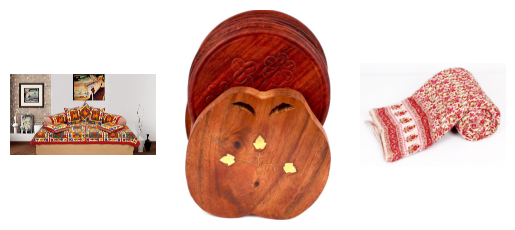

Baby Care


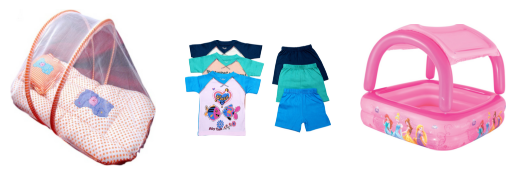

Watches


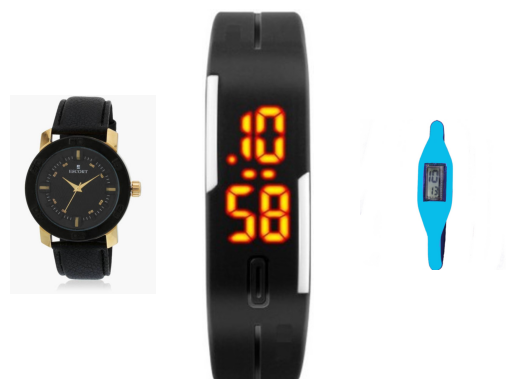

Home Decor & Festive Needs


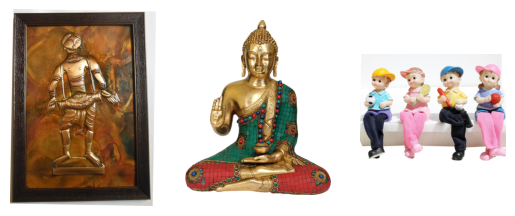

Kitchen & Dining


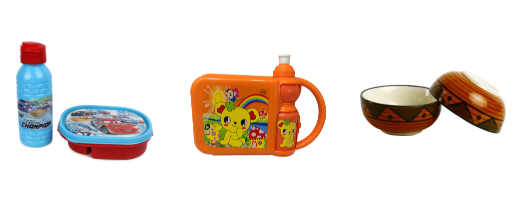

Beauty and Personal Care


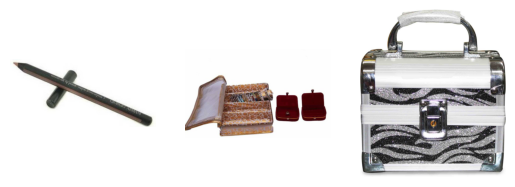

Computers


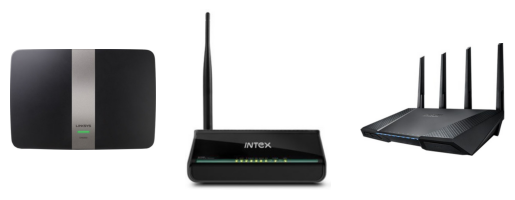

In [31]:
# Liste des labels uniques
list_labels = articles_images["category_product"].unique()

# Fonction pour obtenir les noms d'image pour une cat√©gorie donn√©e
def list_fct(name):
    list_image_name = articles_images.loc[articles_images["category_product"] == name, "image"].tolist()
    return list_image_name

# Boucle pour chaque cat√©gorie de produit
for name in list_labels:
    print(name)
    list_images = list_fct(name)

    # Affichage des images
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path + list_images[i + 10]
        image = imread(filename)
        plt.imshow(image)
        plt.axis('off')
    
    plt.show()

#### -- Extraction d'un √©chantillon de TEST --

In [34]:
# articles_images_test = articles_images.groupby('category_product', group_keys=False).apply(lambda x: x.sample(frac=0.15, random_state=42))
articles_images_train_val, articles_images_test = train_test_split(articles_images, test_size=0.15, random_state=42, stratify=articles_images['category_product'])
print(articles_images_test.shape, articles_images_train_val.shape)

(158, 4) (892, 4)


In [36]:
articles_images_test['category_product'].value_counts()

category_product
Home Furnishing               23
Home Decor & Festive Needs    23
Computers                     23
Watches                       23
Kitchen & Dining              22
Beauty and Personal Care      22
Baby Care                     22
Name: count, dtype: int64

### 2. Approche simple avec pr√©paration des images

#### -- Cr√©ation du mod√®le de classification --

In [40]:
def create_model_fct() :
    # R√©cup√©ration mod√®le pr√©-entra√Æn√©
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layer non entra√Ænables = on garde les poids du mod√®le pr√©-entra√Æn√©
    for layer in model0.layers:
        layer.trainable = False

    # R√©cup√©rer la sortie de ce r√©seau
    x = model0.output
    # Compl√©ter le mod√®le
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)

    # D√©finir le nouveau mod√®le
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du mod√®le 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model

#### -- Fonction de pr√©paration des images --

In [43]:
def image_prep_fct(data):
    prepared_images = []
    for _, row in data.iterrows():
        img = load_img(row['image_path'], target_size=(224, 224))
        img = img_to_array(img)
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        prepared_images.append(img)
    prepared_images_np = np.array(prepared_images)
    return prepared_images_np

images_np = image_prep_fct(articles_images_train_val)
print(images_np.shape)
images_np_test = image_prep_fct(articles_images_test)
print(images_np_test.shape)

C:\Users\druar\anaconda3\envs\Formation_P6_IMAGES\Lib\site-packages\PIL\Image.py:3368: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


(892, 224, 224, 3)
(158, 224, 224, 3)


#### -- Echantillon TEST --

In [45]:
X = images_np
y = to_categorical(articles_images_train_val['category_code'], num_classes=7)

X_test = images_np_test
y_test = to_categorical(articles_images_test['category_code'], num_classes=7)

y

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

#### -- Echantillon TRAIN-VALIDATION --

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)
X_train.shape
X_val.shape

(179, 224, 224, 3)

In [48]:
# Cr√©ation du mod√®le
with tf.device('/gpu:0'): # Cela indique √† TensorFlow d'ex√©cuter toutes les op√©rations li√©es √† la cr√©ation du mod√®le sur le GPU si disponible
    model1 = create_model_fct() 

# Cr√©ation du callback
model1_save_path1 = "./model1_best_weights.keras" # D√©finition du chemin o√π les poids du mod√®le seront sauvegard√©s lors de l'utilisation du callback ModelCheckpoint.
checkpoint = ModelCheckpoint(model1_save_path1, monitor='val_loss', verbose=1, save_best_only=True, mode='min') # Cr√©ation d'un callback ModelCheckpoint qui surveille la perte de validation (val_loss). Il sauvegarde uniquement les poids du mod√®le qui obtiennent la meilleure valeur de perte de validation (mode='min') dans le fichier sp√©cifi√© par model1_save_path1. L'option verbose=1 affiche des messages pendant l'entra√Ænement.
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) # Cr√©ation d'un callback EarlyStopping qui arr√™te l'entra√Ænement si la perte de validation (val_loss) cesse de s'am√©liorer (mode='min') pendant un certain nombre d'√©poques (patience=5). 
callbacks_list = [checkpoint, es] # Liste contenant tous les callbacks cr√©√©s (ModelCheckpoint et EarlyStopping). Cette liste est pass√©e comme argument lors de l'entra√Ænement du mod√®le pour appliquer ces callbacks √† chaque √©poque.

Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer (InputLayer)        ‚îÇ (None, 224, 224, 3)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block1_conv1 (Conv2D)           ‚îÇ (None, 224, 224, 64)   ‚îÇ         1,792 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block1_conv2 (Conv2D)           ‚îÇ (None, 224, 224, 64)   ‚îÇ        36,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block1_pool (MaxPooling2D)      ‚îÇ (None, 112, 112, 64)   ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block2_conv1 (Conv2D)           ‚îÇ (None, 112, 112, 128)  ‚îÇ        73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block2_conv2 (Conv2D)           ‚îÇ (None, 112, 112, 128)  ‚îÇ       147,584 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block2_pool (MaxPooling2D)      ‚îÇ (None, 56, 56, 128)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block3_conv1 (Conv2D)           ‚îÇ (None, 56, 56, 256)    ‚îÇ       295,168 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block3_conv2 (Conv2D)           ‚îÇ (None, 56, 56, 256)    ‚îÇ       590,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block3_conv3 (Conv2D)           ‚îÇ (None, 56, 56, 256)    ‚îÇ       590,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block3_pool (MaxPooling2D)      ‚îÇ (None, 28, 28, 256)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [53]:
# Entra√Æner sur les donn√©es d'entra√Ænement (X_train, y_train)
with tf.device('/gpu:0'): 
    history1 = model1.fit(X_train, y_train, epochs=20, batch_size=64, 
                       callbacks=callbacks_list, validation_data=(X_val, y_val), verbose=1)

Epoch 1/20
12/12 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3s/step - accuracy: 0.3619 - loss: 8.1684
Epoch 1: val_loss improved from inf to 1.45718, saving model to ./model1_best_weights.keras
12/12 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 51s 4s/step - accuracy: 0.3709 - loss: 7.9876 - val_accuracy: 0.6480 - val_loss: 1.4572
Epoch 2/20
12/12 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3s/step - accuracy: 0.6554 - loss: 2.2197
Epoch 2: val_loss improved from 1.45718 to 1.38748, saving model to ./model1_best_weights.keras
12/12 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 50s 4s/step - accuracy: 0.6573 - loss: 2.2081 - val_accuracy: 0.7095 - val_loss: 1.3875
Epoch 3/20
12/12 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3s/step - accuracy: 0.7441 - loss: 1.6013
Epoch 3: val_loss improved from 1.38748 to 0.97370, saving model to ./model1_best_weights.keras
12/12 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [55]:
# Score du dernier epoch

loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model1.evaluate(X_val, y_val, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))

23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39s 2s/step - accuracy: 1.0000 - loss: 0.0080
Training Accuracy: 1.0000

6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 2s/step - accuracy: 0.7798 - loss: 0.8833
Validation Accuracy:  0.7933


In [56]:
# Score de l'epoch optimal

model1.load_weights(model1_save_path1)

loss, accuracy = model1.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

Validation Accuracy :  0.8212
Test Accuracy       :  0.7848


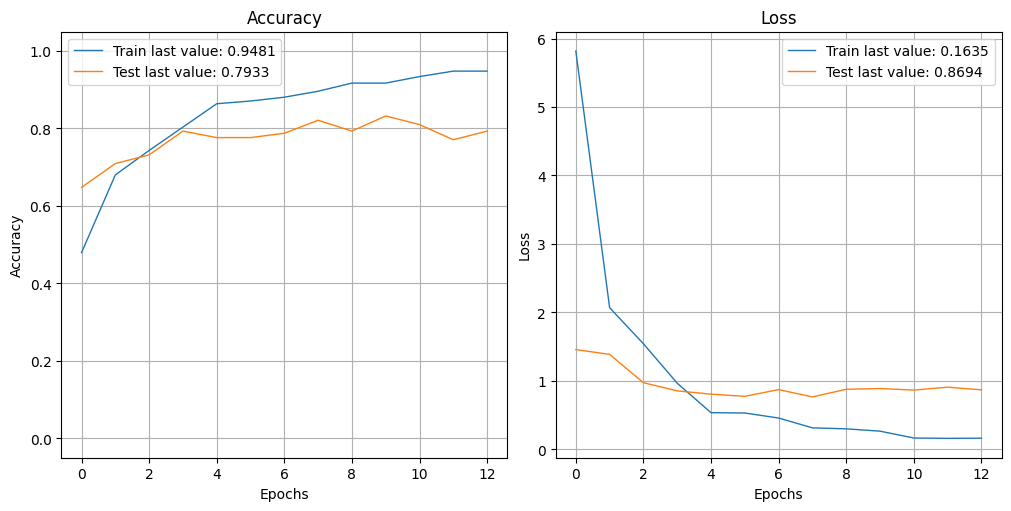

In [57]:
from plot_keras_history import show_history, plot_history

show_history(history1)
plot_history(history1, path="standard.png") # Ici train = train et test = validation
plt.close()

#### -- R√©sultats sur l'√©chantillon de TEST --

In [74]:
y_test_num = np.argmax(y_test, axis=1)
y_test_pred = np.argmax(model1.predict(X_test), axis=1)
predictions = model1.predict(X_test)
print(y_test_num)
print()
print(y_test_pred)

5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 2s/step
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 2s/step
[4 4 5 5 3 3 1 3 3 2 6 1 5 0 2 5 6 6 4 4 1 0 0 0 0 1 2 1 4 5 3 5 4 0 1 2 5
 6 4 3 0 0 2 6 6 4 0 2 1 2 2 0 0 3 5 6 3 1 3 2 6 6 0 6 0 4 5 3 2 3 3 5 0 1
 3 4 2 2 1 2 0 6 3 5 6 4 6 2 2 6 3 1 5 1 4 6 6 4 1 6 5 2 3 4 1 3 2 5 4 0 5
 2 4 1 3 2 5 4 3 1 5 6 1 1 6 1 3 0 3 5 4 4 2 1 5 2 4 5 1 6 2 2 6 0 0 5 0 4
 4 3 6 4 3 0 5 0 6 1]

[1 0 5 5 3 0 1 2 3 3 6 1 0 0 2 5 6 6 4 4 1 3 0 0 0 1 2 1 4 5 3 5 0 4 1 5 5
 2 4 3 0 4 2 6 6 4 0 2 1 2 5 4 0 3 5 6 2 3 3 2 6 6 4 0 0 4 5 3 2 3 3 5 4 1
 3 4 2 2 1 2 0 3 3 5 6 4 3 2 2 6 3 1 5 3 4 6 6 0 1 3 5 2 3 4 1 3 2 3 4 0 5
 5 4 1 3 2 5 4 3 1 5 2 6 1 6 1 5 0 3 5 4 4 2 3 5 2 4 5 5 6 4 6 6 0 4 5 0 4
 4 3 6 4 3 0 5 0 6 1]


In [75]:
# Afficher quelques pr√©dictions
for i in range(10):
    print(f"Image {i}: V√©rit√© terrain = {y_test_num[i]}, Pr√©diction = {y_test_pred[i]}, Probabilit√©s = {predictions[i]}")

Image 0: V√©rit√© terrain = 4, Pr√©diction = 1, Probabilit√©s = [3.6832789e-04 9.7406840e-01 2.4686174e-02 8.5316715e-04 1.9998626e-05
 4.6411003e-07 3.5484429e-06]
Image 1: V√©rit√© terrain = 4, Pr√©diction = 0, Probabilit√©s = [7.8945851e-01 9.7478136e-02 3.9827120e-03 4.4468638e-02 5.0802484e-02
 1.3678134e-02 1.3129758e-04]
Image 2: V√©rit√© terrain = 5, Pr√©diction = 5, Probabilit√©s = [1.2596713e-01 1.3078232e-05 8.3591587e-09 5.6840933e-04 4.0473827e-07
 8.7344974e-01 1.2174412e-06]
Image 3: V√©rit√© terrain = 5, Pr√©diction = 5, Probabilit√©s = [2.7810002e-04 5.7610318e-06 1.6236054e-08 3.2614506e-07 9.4073293e-08
 9.9971575e-01 6.8254014e-10]
Image 4: V√©rit√© terrain = 3, Pr√©diction = 3, Probabilit√©s = [2.9232547e-07 1.9365163e-09 2.0171337e-05 9.9996066e-01 3.3153399e-10
 1.8880039e-05 7.1533257e-12]
Image 5: V√©rit√© terrain = 3, Pr√©diction = 0, Probabilit√©s = [9.4939506e-01 1.0609174e-03 2.2595334e-03 4.3400802e-02 1.6558695e-05
 2.4890027e-03 1.3782424e-03]
Image 6: V

In [76]:
conf_mat = metrics.confusion_matrix(y_test_num, y_test_pred)
print(conf_mat)

[[15  0  0  1  6  0  0]
 [ 0 17  0  3  0  1  1]
 [ 0  0 17  1  1  3  1]
 [ 1  0  2 19  0  1  0]
 [ 3  1  0  0 19  0  0]
 [ 1  0  0  1  0 20  0]
 [ 1  0  2  3  0  0 17]]


In [77]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

In [78]:
y_test_pred_transform = conf_mat_transform(y_test_num, y_test_pred)
conf_mat = metrics.confusion_matrix(y_test_num, y_test_pred_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_test_num, y_test_pred_transform))

Correspondance des clusters :  [0 1 2 3 4 5 6]
[[15  0  0  1  6  0  0]
 [ 0 17  0  3  0  1  1]
 [ 0  0 17  1  1  3  1]
 [ 1  0  2 19  0  1  0]
 [ 3  1  0  0 19  0  0]
 [ 1  0  0  1  0 20  0]
 [ 1  0  2  3  0  0 17]]

              precision    recall  f1-score   support

           0       0.71      0.68      0.70        22
           1       0.94      0.77      0.85        22
           2       0.81      0.74      0.77        23
           3       0.68      0.83      0.75        23
           4       0.73      0.83      0.78        23
           5       0.80      0.91      0.85        22
           6       0.89      0.74      0.81        23

    accuracy                           0.78       158
   macro avg       0.80      0.78      0.79       158
weighted avg       0.80      0.78      0.79       158



In [79]:
label_corresp = ['Baby Care','Beauty and Personal Care', 'Computers','Home Decor & Festive Needs' , 'Home Furnishing',  'Kitchen & Dining', 'Watches']

<Axes: >

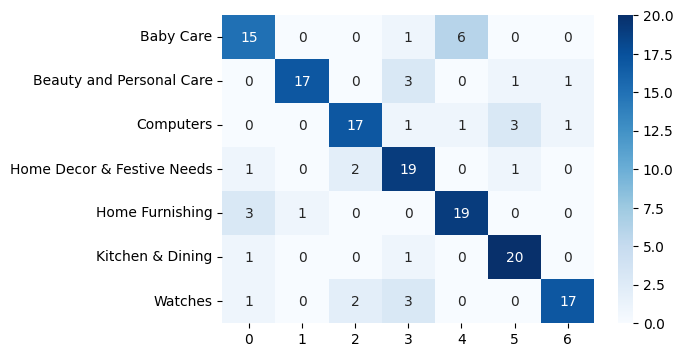

In [80]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in label_corresp],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

### 3. Approche nouvelle par Dataset avec data augmentation int√©gr√©e au mod√®le

CF https://www.tensorflow.org/tutorials/images/data_augmentation

#### -- Pr√©paration des images --

In [90]:
def process_path(image_path, label, index):
    ''' Cette fonction charge une image √† partir de son chemin, la d√©code, 
    la redimensionne et la normalise. Elle retourne l'image et son label. '''
    # Lire l'image √† partir du chemin et la redimensionner
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224, 224])
    # img = tf.cast(img, tf.float32) / 127.5 - 1.0  # Normalisation
    return img, label, index

In [92]:
batch_size = 32

def dataset_fct(dataframe, validation_split=0, subset=None, batch_size=32):
    
    ''' Encodage des labels : Les labels de cat√©gories sont convertis en indices entiers puis en vecteurs one-hot encod√©s.
        Cr√©ation du dataset : Un tf.data.Dataset est cr√©√© √† partir des chemins d'images et des labels.
        M√©lange et fractionnement : Le dataset est m√©lang√©, puis fractionn√© en ensembles d'entra√Ænement et de validation selon le validation_split et le subset sp√©cifi√©.
        Chargement des images : La fonction process_path est appliqu√©e pour charger les images et leurs labels.
        Configuration du dataset : Le dataset est configur√© pour √™tre performant, avec des lots et du pr√©chargement. '''
    
    # Convertir les labels en one-hot encod√©s
    class_names = sorted(dataframe['category_product'].unique())
    num_classes = len(class_names)
    class_indices = {name: index for index, name in enumerate(class_names)}
    dataframe['label'] = dataframe['category_product'].map(class_indices)
    
    # Convertir les chemins d'images, les labels et les indices en tensors
    image_paths = dataframe['image_path'].values
    labels = tf.keras.utils.to_categorical(dataframe['label'].values, num_classes=num_classes)
    indices = dataframe.index.values
    
    # Cr√©er un dataset √† partir des chemins d'images, des labels et des indices
    def create_dataset(image_paths, labels, indices):
        dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels, indices))
        dataset = dataset.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)
        dataset = dataset.batch(batch_size)
        dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE) # Configurer l'ensemble de donn√©es pour les performances : Dataset.prefetch chevauche le pr√©traitement des donn√©es et l'ex√©cution du mod√®le pendant la formation.
        return dataset
    
    # Fractionner le dataset en ensembles d'entra√Ænement et de validation
    if validation_split > 0:
        validation_size = int(validation_split * len(image_paths))
        train_size = len(image_paths) - validation_size
        
        train_dataset = create_dataset(image_paths[:train_size], labels[:train_size], indices[:train_size])
        validation_dataset = create_dataset(image_paths[train_size:], labels[train_size:], indices[train_size:])
        
        if subset == 'training':
            return train_dataset
        elif subset == 'validation':
            return validation_dataset
        else:
            raise ValueError("subset must be either 'training' or 'validation'")
    else:
        return create_dataset(image_paths, labels, indices)

In [94]:
# D√©finition des datasets d'entra√Ænement et de validation
train_dataset = dataset_fct(articles_images_train_val, validation_split=0.2, subset='training')
val_dataset = dataset_fct(articles_images_train_val, validation_split=0.2, subset='validation')
test_dataset = dataset_fct(articles_images_test, validation_split=0)

# V√©rification des datasets, shape pour une image
for image, label, indice in test_dataset.take(1):
    print(image.shape, label.shape, indice.shape)

(32, 224, 224, 3) (32, 7) (32,)


#### -- Augmentation des donn√©es : test sur une image --
L'augmentation des donn√©es consiste √† appliquer des modifications sur les images existantes pour permettre au mod√®le d'apprendre sur une plus grande quantit√© et vari√©t√© d'images.

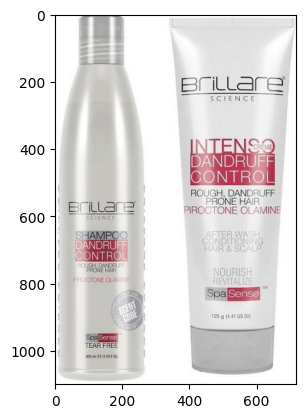

In [97]:
image = imread(articles_images['image_path'][59])
plt.imshow(image)

In [99]:
image = tf.expand_dims(image, 0)

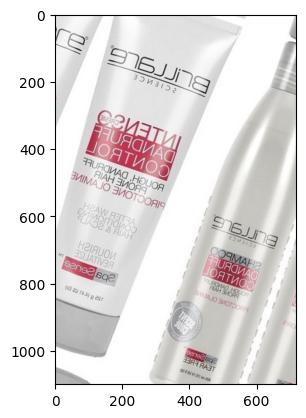

In [101]:
data_augmentation = Sequential([
        RandomFlip("horizontal"),
        RandomRotation(0.1),
        RandomZoom(0.1)
    ])

augmented_image = data_augmentation(image)
plt.imshow(augmented_image[0] / 255.0)

#### -- D√©finition du mod√®le --

In [104]:
# D√©finition du mod√®le
def create_model_fct2():
    # D√©finir l'entr√©e du mod√®le
    inputs = Input(shape=(224, 224, 3)) # La couche d'entr√©e est d√©finie avec une forme explicite
    
    # Data augmentation
    data_augmentation = Sequential([
        RandomFlip("horizontal"),
        RandomRotation(0.1),
        RandomZoom(0.1)
    ])
    
    # Appliquer l'augmentation des donn√©es : la s√©quence de l'augmentation des donn√©es est appliqu√©e aux entr√©es
    x = data_augmentation(inputs)
    x = Rescaling(1./127.5, offset=-1)(x)
    
    # R√©cup√©ration du mod√®le pr√©-entra√Æn√©
    model_base = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    for layer in model_base.layers:
        layer.trainable = False

    # Appliquer le mod√®le de base
    x = model_base(x) # Le mod√®le pr√©-entra√Æn√© VGG16 est appliqu√© aux donn√©es apr√®s l'augmentation
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x) # R√©gulation entre 0 et 1
    outputs = Dense(7, activation='softmax')(x)
    
    # D√©finir le mod√®le complet : Le mod√®le complet est d√©fini en utilisant les entr√©es et les sorties
    model = Model(inputs=inputs, outputs=outputs)

    # Compilation du mod√®le 
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

    # Affichage du r√©sum√© du mod√®le
    print(model.summary())
    
    return model


In [106]:
# Cr√©ation du mod√®le
with tf.device('/gpu:0'): 
    model4 = create_model_fct2()
    
# Cr√©ation du callback
model4_save_path = "./model4_best_weights.keras"
checkpoint = ModelCheckpoint(model4_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "functional_3"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_2 (InputLayer)      ‚îÇ (None, 224, 224, 3)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ sequential_1 (Sequential)       ‚îÇ (None, 224, 224, 3)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ rescaling (Rescaling)           ‚îÇ (None, 224, 224, 3)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ vgg16 (Functional)              ‚îÇ (None, 7, 7, 512)      ‚îÇ    14,714,688 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_average_pooling2d_1      ‚îÇ (None, 512)            ‚îÇ             0 ‚îÇ
‚îÇ (GlobalAveragePooling2D)        ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 256)            ‚îÇ       131,328 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)             ‚îÇ (None, 256)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                 ‚îÇ (None, 7)              ‚îÇ         1,799 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


#### -- Entrainer le mod√®le --

In [109]:
# Cr√©er des copies des datasets sans les indices
train_dataset_without_indices = train_dataset.map(lambda image, label, index: (image, label))
validation_dataset_without_indices = val_dataset.map(lambda image, label, index: (image, label))
test_dataset_without_indices = test_dataset.map(lambda image, label, index: (image, label))

In [111]:
with tf.device('/gpu:0'): 
    history4 = model4.fit(train_dataset_without_indices,
                           batch_size=batch_size, epochs=20, callbacks=callbacks_list,
                           validation_data=validation_dataset_without_indices, verbose=1)

Epoch 1/20
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2s/step - accuracy: 0.2116 - loss: 2.0324
Epoch 1: val_loss improved from inf to 1.33008, saving model to ./model4_best_weights.keras
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 53s 2s/step - accuracy: 0.2141 - loss: 2.0253 - val_accuracy: 0.7079 - val_loss: 1.3301
Epoch 2/20
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3s/step - accuracy: 0.5294 - loss: 1.4339
Epoch 2: val_loss improved from 1.33008 to 0.99730, saving model to ./model4_best_weights.keras
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 74s 3s/step - accuracy: 0.5305 - loss: 1.4307 - val_accuracy: 0.7472 - val_loss: 0.9973
Epoch 3/20
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2s/step - accuracy: 0.5943 - loss: 1.2096
Epoch 3: val_loss improved from 0.99730 to 0.83888, saving model to ./model4_best_weights.keras
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [114]:
# Score du dernier epoch

loss, accuracy = model4.evaluate(train_dataset_without_indices, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model4.evaluate(validation_dataset_without_indices, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 43s 2s/step - accuracy: 0.8681 - loss: 0.4159
Training Accuracy   : 0.8768

6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 2s/step - accuracy: 0.8295 - loss: 0.5058
Validation Accuracy :  0.8202


In [115]:
# Score de l'epoch optimal

model4.load_weights(model4_save_path)

loss, accuracy = model4.evaluate(validation_dataset_without_indices, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model4.evaluate(test_dataset_without_indices, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))


Validation Accuracy :  0.8202
Test Accuracy       :  0.8228


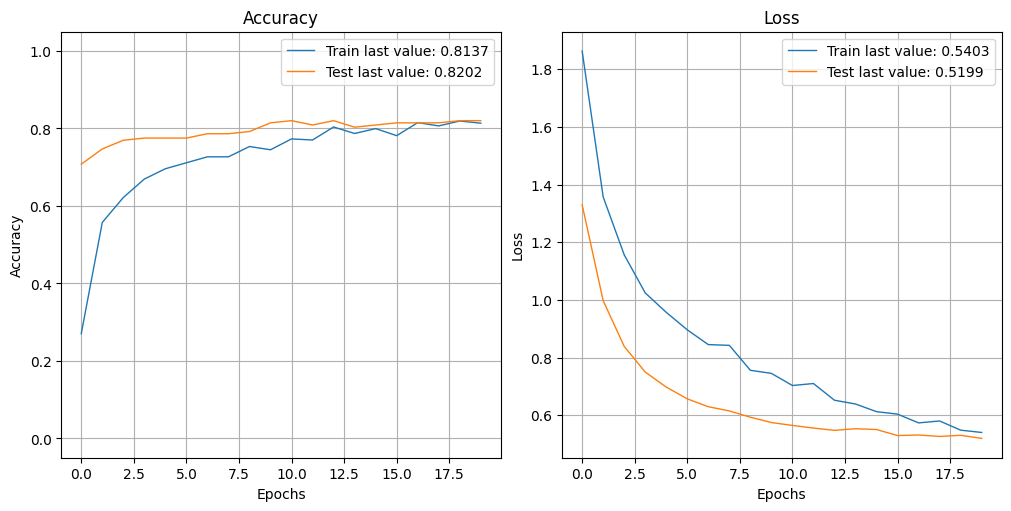

In [116]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history4) # Test = validation sur les graphs
plot_history(history4, path="standard.png")
plt.close()

#### -- R√©sultats sur l'√©chantillon de TEST --

In [121]:
# D√©finition de l'√©chantillon test :
images_np_test = image_prep_fct(articles_images_test)

X_test = images_np_test
y_test = to_categorical(articles_images_test['category_code'], num_classes=7)

In [122]:
y_test_num = np.argmax(y_test, axis=1)
y_test_pred = np.argmax(model4.predict(X_test), axis=1)

print(y_test_num)
print()
print(y_test_pred)

5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 2s/step
[4 4 5 5 3 3 1 3 3 2 6 1 5 0 2 5 6 6 4 4 1 0 0 0 0 1 2 1 4 5 3 5 4 0 1 2 5
 6 4 3 0 0 2 6 6 4 0 2 1 2 2 0 0 3 5 6 3 1 3 2 6 6 0 6 0 4 5 3 2 3 3 5 0 1
 3 4 2 2 1 2 0 6 3 5 6 4 6 2 2 6 3 1 5 1 4 6 6 4 1 6 5 2 3 4 1 3 2 5 4 0 5
 2 4 1 3 2 5 4 3 1 5 6 1 1 6 1 3 0 3 5 4 4 2 1 5 2 4 5 1 6 2 2 6 0 0 5 0 4
 4 3 6 4 3 0 5 0 6 1]

[3 0 5 5 3 3 1 2 3 3 6 1 0 0 2 3 6 6 4 4 1 0 0 4 0 1 2 1 4 5 3 5 4 4 1 2 5
 6 4 2 5 0 2 6 6 4 0 2 1 2 3 0 0 3 5 6 2 3 3 2 6 6 0 6 0 4 5 3 1 3 3 5 4 1
 3 4 2 2 1 2 0 3 3 5 6 4 6 2 2 6 3 1 5 3 4 6 6 4 1 6 5 2 3 4 1 3 4 5 4 4 5
 2 4 1 3 2 5 1 3 1 3 6 6 1 6 1 1 0 3 5 4 4 2 2 5 2 4 5 2 6 2 6 6 0 4 5 0 4
 4 3 6 0 3 0 6 0 6 1]


In [124]:
predictions_Xtest = model4.predict(X_test)

5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 2s/step


In [125]:
# Afficher quelques pr√©dictions
for i in range(10):
    print(f"Image {i}: V√©rit√© terrain = {y_test_num[i]}, Pr√©diction = {y_test_pred[i]}, Probabilit√©s = {predictions_Xtest[i]}")

Image 0: V√©rit√© terrain = 4, Pr√©diction = 3, Probabilit√©s = [0.03033995 0.18093969 0.3644161  0.37837285 0.0289794  0.00773187
 0.00922009]
Image 1: V√©rit√© terrain = 4, Pr√©diction = 0, Probabilit√©s = [0.3453832  0.14937781 0.01321391 0.23358835 0.20067619 0.05569099
 0.00206956]
Image 2: V√©rit√© terrain = 5, Pr√©diction = 5, Probabilit√©s = [0.0044304  0.02568604 0.00154112 0.03283314 0.00156903 0.58675694
 0.3471834 ]
Image 3: V√©rit√© terrain = 5, Pr√©diction = 5, Probabilit√©s = [0.03603817 0.03166891 0.0098692  0.19360586 0.00866291 0.7148815
 0.00527356]
Image 4: V√©rit√© terrain = 3, Pr√©diction = 3, Probabilit√©s = [0.0489828  0.00257246 0.00930065 0.92792284 0.00137777 0.00591551
 0.00392798]
Image 5: V√©rit√© terrain = 3, Pr√©diction = 3, Probabilit√©s = [0.10171508 0.03058702 0.10924651 0.70786035 0.01337558 0.03360331
 0.00361219]
Image 6: V√©rit√© terrain = 1, Pr√©diction = 1, Probabilit√©s = [5.0941813e-05 9.9916518e-01 1.5613429e-04 3.3228603e-04 4.7422811e-05
 2

In [126]:
conf_mat = metrics.confusion_matrix(y_test_num, y_test_pred)
print(conf_mat)

[[16  0  0  0  5  1  0]
 [ 0 17  2  2  0  0  1]
 [ 0  1 18  2  1  0  1]
 [ 0  1  3 19  0  0  0]
 [ 2  1  0  1 19  0  0]
 [ 1  0  0  2  0 18  1]
 [ 0  0  0  1  0  0 22]]


In [127]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

In [128]:
y_test_pred_transform = conf_mat_transform(y_test_num, y_test_pred)
conf_mat = metrics.confusion_matrix(y_test_num, y_test_pred_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_test_num, y_test_pred_transform))

Correspondance des clusters :  [0 1 2 3 4 5 6]
[[16  0  0  0  5  1  0]
 [ 0 17  2  2  0  0  1]
 [ 0  1 18  2  1  0  1]
 [ 0  1  3 19  0  0  0]
 [ 2  1  0  1 19  0  0]
 [ 1  0  0  2  0 18  1]
 [ 0  0  0  1  0  0 22]]

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        22
           1       0.85      0.77      0.81        22
           2       0.78      0.78      0.78        23
           3       0.70      0.83      0.76        23
           4       0.76      0.83      0.79        23
           5       0.95      0.82      0.88        22
           6       0.88      0.96      0.92        23

    accuracy                           0.82       158
   macro avg       0.82      0.82      0.82       158
weighted avg       0.82      0.82      0.82       158



In [129]:
label_corresp = ['Baby Care','Beauty and Personal Care', 'Computers','Home Decor & Festive Needs' , 'Home Furnishing',  'Kitchen & Dining', 'Watches']

<Axes: >

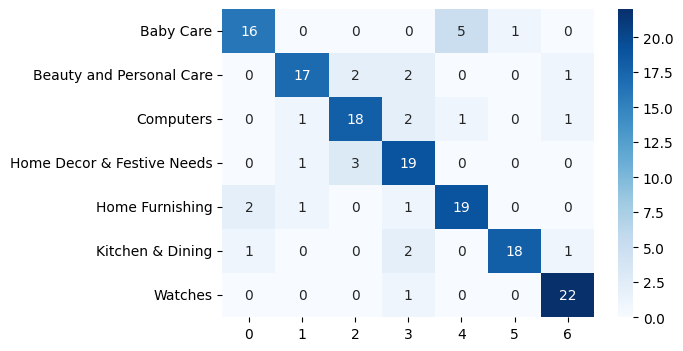

In [130]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in label_corresp],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

In [131]:
# Trouver les indices des images de la classe 2 qui sont mal class√©es
indices_mal_classes = np.where((y_test_num == 2) & (y_test_pred_transform != 2))[0]

# R√©cup√©rer les images correspondantes
images_mal_classes = images_np_test[indices_mal_classes]

print("Indices des images mal class√©es :", indices_mal_classes)

Indices des images mal class√©es : [  9  50  68 106 141]


In [132]:
# On r√©cup√®re et on affiche les images concern√©es :
images_mal_class√©es = articles_images_test.iloc[indices_mal_classes]

In [133]:
images_mal_class√©es

image  \
119  db6c79a1d852944a89e157793f392d67.jpg   
844  2c475daafe597ed93c1e27fcaa38d8cc.jpg   
87   e8ee7868b0c3d1d04b482cd4f3ec5ccc.jpg   
397  c2e71e7c97489d4efa5eab796ae354ac.jpg   
639  aeb421e416716d5f037d50e8c3b14cd7.jpg   

                                            image_path category_product  \
119  C:\Users\druar\OneDrive\Documents\01_Formation...        Computers   
844  C:\Users\druar\OneDrive\Documents\01_Formation...        Computers   
87   C:\Users\druar\OneDrive\Documents\01_Formation...        Computers   
397  C:\Users\druar\OneDrive\Documents\01_Formation...        Computers   
639  C:\Users\druar\OneDrive\Documents\01_Formation...        Computers   

     category_code  label  
119              2      2  
844              2      2  
87               2      2  
397              2      2  
639              2      2

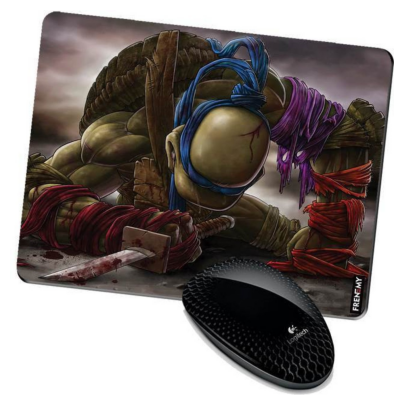

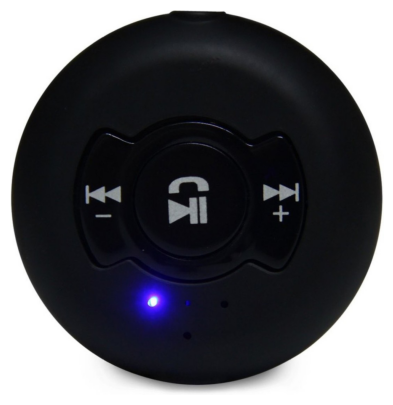

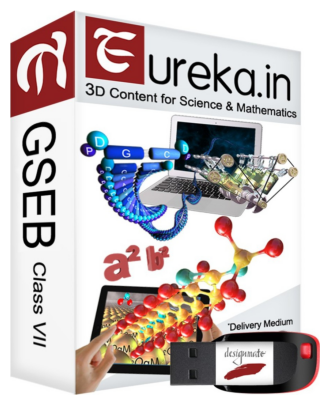

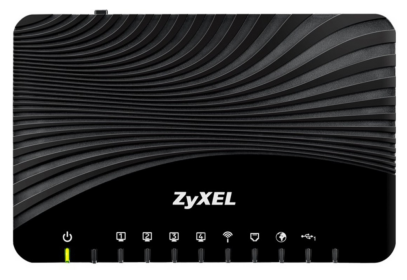

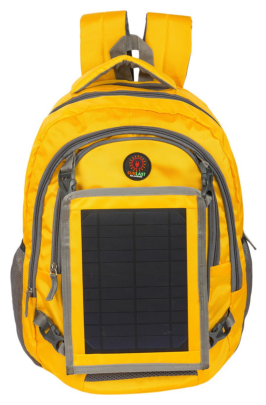

In [134]:
# Parcourir chaque ligne du DataFrame et afficher les images
for index, row in images_mal_class√©es.iterrows():
    image_path = row['image_path']
    image = imread(image_path)
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')  # Masquer les axes
    plt.show()

<div class="alert alert-block alert-info">
    <b> RESULTATS avec CNN et DataAugmentation : </b> 
    
- Avec une exactitude de 0.80, le mod√®le semble bien fonctionner globalement, bien qu'il y ait de la place pour l'am√©lioration, notamment pour certaines cat√©gories sp√©cifiques comme les ordinateurs.
- L'augmentation des donn√©es permet de diminuer le sur-apprentissage et ainsi de cr√©er un mod√®le qui g√©n√©ralise beaucoup  mieux (√©cart entre le train et la validation largement r√©duit).
- La classe 6 (Watches) a la meilleure performance avec un score F1 de 0.91, ce qui indique que le mod√®le est tr√®s bon pour pr√©dire cette cat√©gorie, les images sp√©cifiques des montres le permettent.
- Les images des cat√©gories 0, 2, 3 et 4 (Baby care, computers, home and festive needs et home furnishing) sont les moins bien class√©es (- de 77% d'exactitude). La classe 2 a la plus faible pr√©cision (0.67) et un rappel de 0.78, ce qui indique qu'il y a des erreurs significatives dans la pr√©diction de cette cat√©gorie (Computers), en regardant les images de plus pr√™t on se rend compte qu'elle peuvent pr√©ter √† confusion (tapis de souris, boite de jeux avec un ordinateur dessin√© dessus, image blanche, etc.).
    
</div>